In [1]:
%cd ..

D:\SoftUni\Data Science\7. Data science project architecture\07.Lab


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
asthma_data = pd.read_csv('data/asthma_data_cleaned.csv')

In [86]:
asthma_data

,age,gender,ethnicity,education_level,bmi,smoking,physical_activity,diet_quality,sleep_quality,pollution_exposure,pollen_exposure,dust_exposure,pet_allergy,family_history_asthma,history_of_allergies,eczema,hay_fever,gastroesophageal_reflux,lung_function_fev1,lung_function_fvc,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis
0,63,0,1,0,15.85,0,0.89,5.49,8.70,7.39,2.86,0.97,1,1,0,0,0,0,1.37,4.94,0,0,1,0,0,1,0
1,26,1,2,2,22.76,0,5.90,6.34,5.15,1.97,7.46,6.58,0,0,1,0,0,0,2.20,1.70,1,0,0,1,1,1,0
2,57,0,2,1,18.40,0,6.74,9.20,6.84,1.46,1.45,5.45,0,1,1,0,1,0,1.70,5.02,1,1,1,0,1,1,0
3,40,1,2,1,38.52,0,1.40,5.83,4.25,0.58,7.57,3.97,0,0,0,0,1,0,3.03,2.30,1,0,1,1,1,0,0
4,61,0,0,3,19.28,0,4.60,3.13,9.63,0.98,3.05,8.26,0,0,0,0,1,0,3.47,3.07,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,2,29.06,0,3.02,6.12,8.30,2.48,7.31,3.43,1,0,1,0,0,0,3.13,5.17,0,1,0,0,0,1,1
2388,18,1,0,1,20.74,0,5.81,4.39,7.73,7.73,2.28,6.47,0,0,0,1,0,0,1.13,5.51,0,0,0,1,1,0,1
2389,54,0,3,2,37.08,0,4.74,8.21,7.48,2.79,3.06,9.48,0,0,0,0,1,0,1.69,3.35,1,0,1,1,0,1,1
2390,46,1,0,2,23.44,0,9.67,7.36,6.72,9.45,7.71,5.05,0,1,1,0,0,1,3.48,1.71,0,1,1,0,1,1,0


### Correlation matrix

In [15]:
pd.set_option('display.max_columns', None)

In [80]:
correlation_matrix_pearson = asthma_data.corr()

In [82]:
correlation_matrix_pearson.unstack().sort_values(ascending = False).drop_duplicates()

age                    age                   1.000000
bmi                    dust_exposure         0.064842
diagnosis              exercise_induced      0.053956
nighttime_symptoms     dust_exposure         0.050120
diet_quality           physical_activity     0.049525
                                               ...   
pollution_exposure     age                  -0.042330
family_history_asthma  lung_function_fev1   -0.045617
diet_quality           pet_allergy          -0.053938
shortness_of_breath    smoking              -0.059075
hay_fever              wheezing             -0.059298
Length: 352, dtype: float64

There are no arrapent positive or negative linear relationships between features. The higher value of correlation coefficient for 'diagnosis' is 0.064 against 'exercise_induced'.

### Distributions of continuous variables

#### Demographic

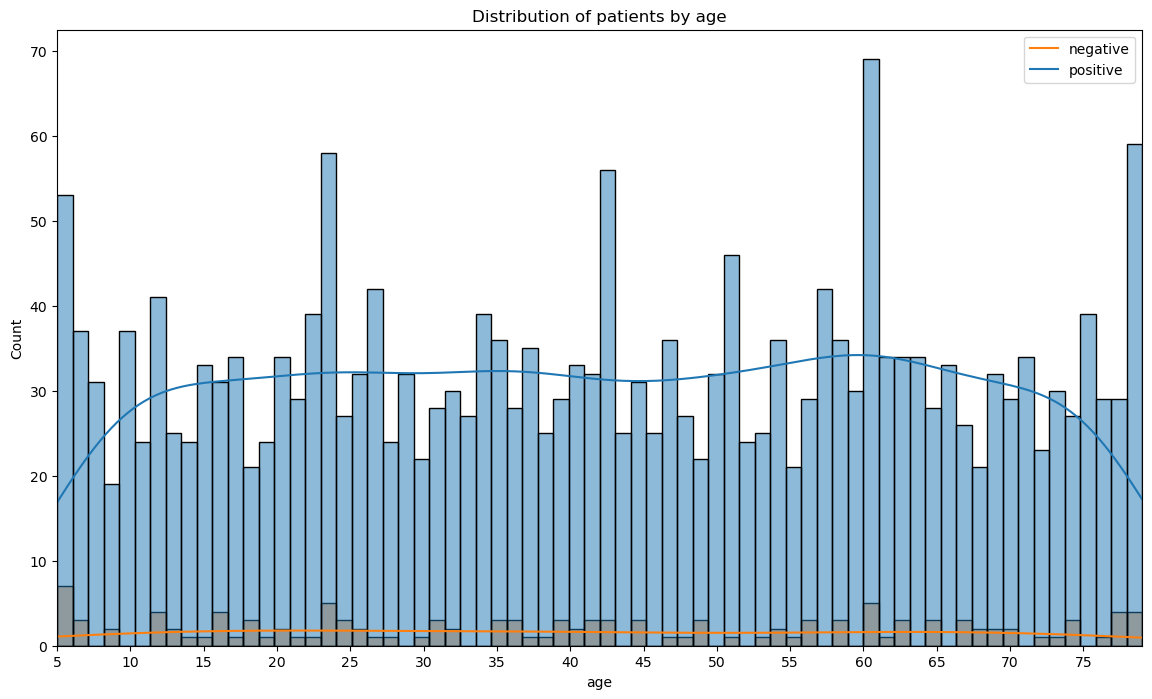

In [271]:
plt.figure(figsize = (14, 8))

sns.histplot(data = asthma_data, x = 'age', hue = 'diagnosis', bins = 70, kde = True)

plt.xlim(5, 79)
plt.xticks(np.arange(5, 80, 5))

plt.title('Distribution of patients by age')
plt.legend(labels = ['negative', 'positive'])

plt.show()

#### Lifestyle factors

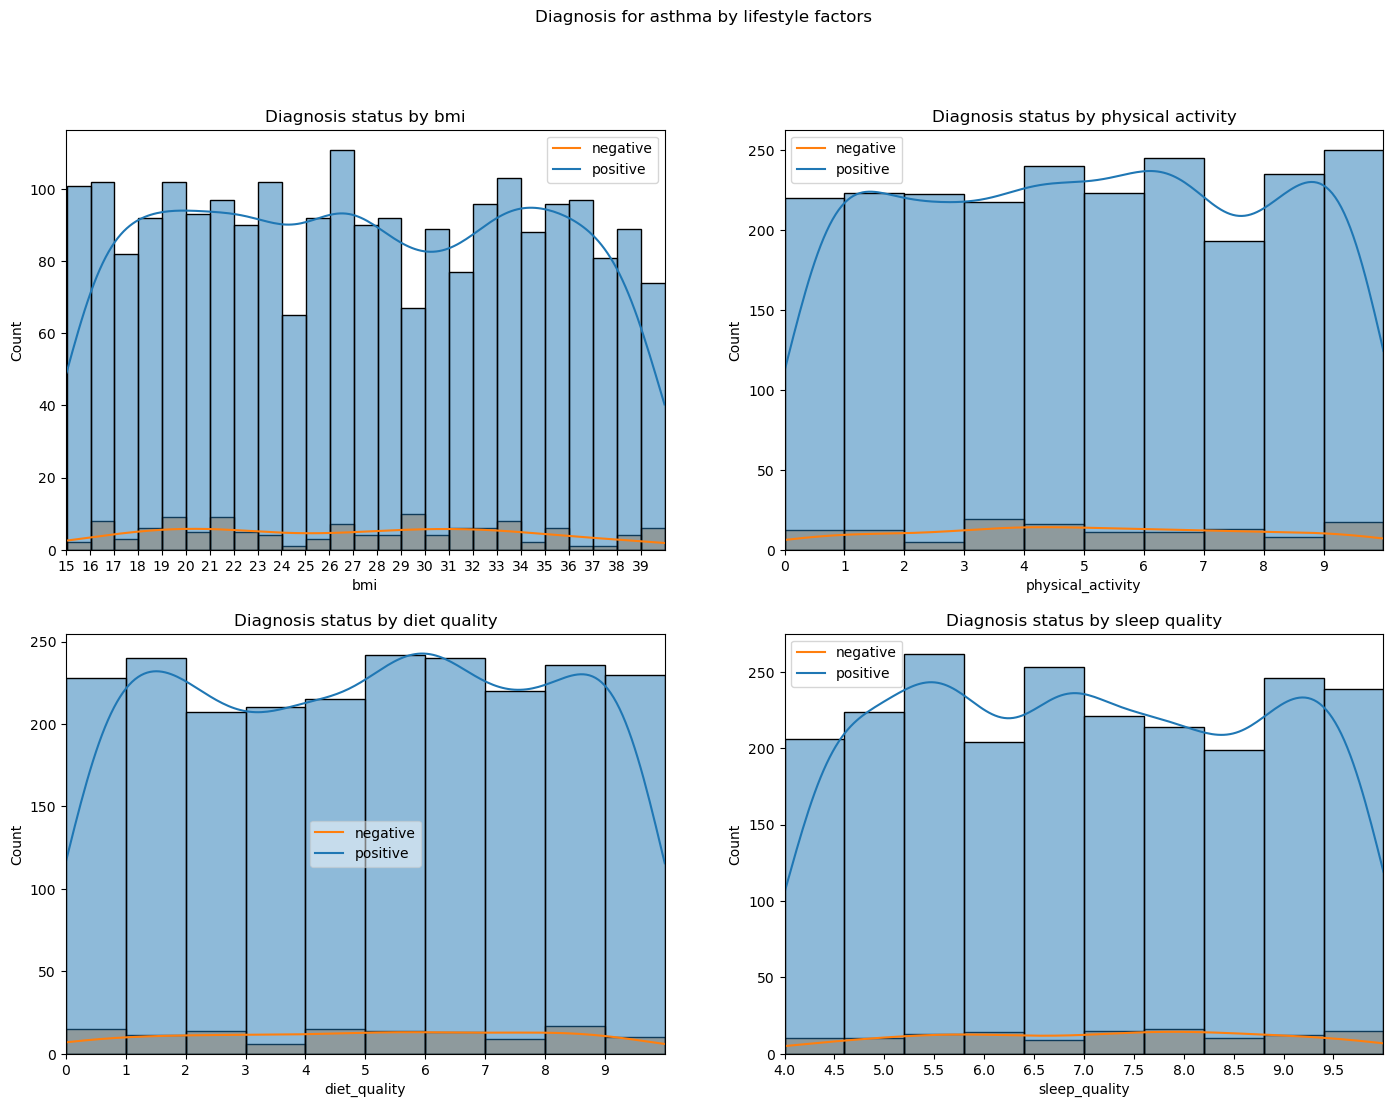

In [75]:
fig, axes = plt.subplots(2, 2, figsize = (17, 12))

sns.histplot(ax = axes[0, 0], data = asthma_data, x = 'bmi', hue = 'diagnosis', bins = 25, kde = True)
sns.histplot(ax = axes[0, 1], data = asthma_data, x = 'physical_activity', hue = 'diagnosis', bins = 10, kde = True)
sns.histplot(ax = axes[1, 0], data = asthma_data, x = 'diet_quality', hue = 'diagnosis', bins = 10, kde = True)
sns.histplot(ax = axes[1, 1], data = asthma_data, x = 'sleep_quality', hue = 'diagnosis', bins = 10, kde = True)

fig.suptitle('Diagnosis for asthma by lifestyle factors')
axes[0, 0].set_title('Diagnosis status by bmi')
axes[0, 1].set_title('Diagnosis status by physical activity')
axes[1, 0].set_title('Diagnosis status by diet quality')
axes[1, 1].set_title('Diagnosis status by sleep quality')

axes[0, 0].set_xticks(np.arange(15, 40))
axes[0, 0].set_xlim(15, 40)
axes[0, 1].set_xticks(np.arange(0, 10, 1))
axes[0, 1].set_xlim(0, 10)
axes[1, 0].set_xticks(np.arange(0, 10, 1))
axes[1, 0].set_xlim(0, 10)
axes[1, 1].set_xticks(np.arange(4, 10, 0.5))
axes[1, 1].set_xlim(4, 10)

axes[0, 0].legend(labels = ['negative', 'positive'])
axes[0, 1].legend(labels = ['negative', 'positive'])
axes[1, 0].legend(labels = ['negative', 'positive'], framealpha = 0.5)
axes[1, 1].legend(labels = ['negative', 'positive'])

plt.show()

#### Environmental and allergy factors

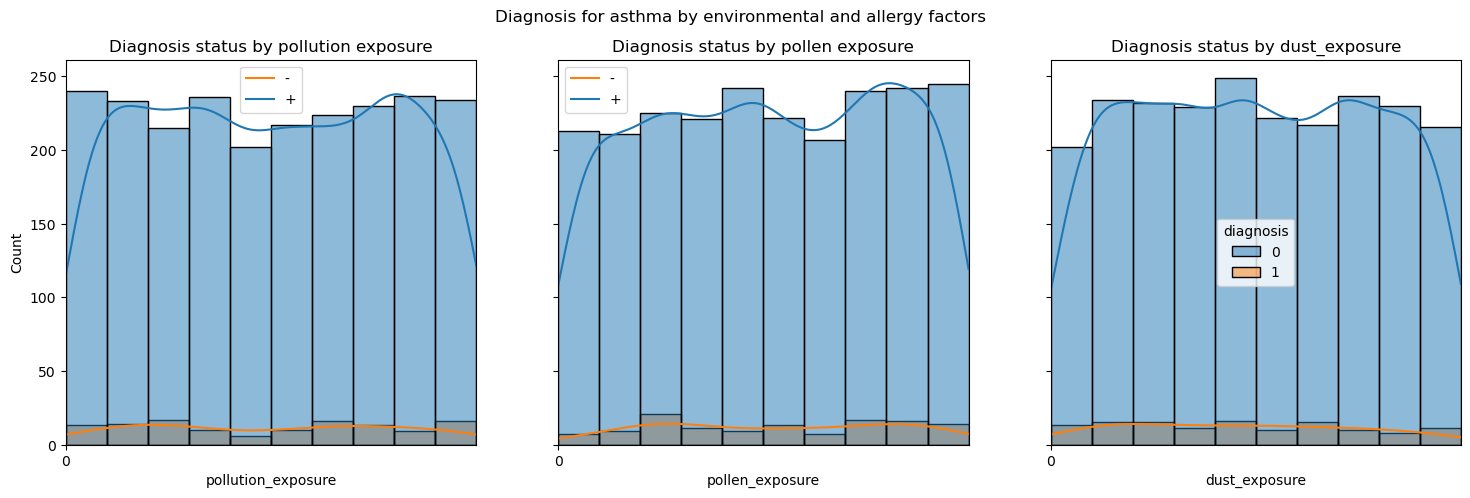

In [78]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5), sharey = True)

sns.histplot(ax = axes[0], data = asthma_data, x = 'pollution_exposure', hue = 'diagnosis', bins = 10, kde = True)
sns.histplot(ax = axes[1], data = asthma_data, x = 'pollen_exposure', hue = 'diagnosis', bins = 10, kde = True)
sns.histplot(ax = axes[2], data = asthma_data, x = 'dust_exposure', hue = 'diagnosis', bins = 10, kde = True)

fig.suptitle('Diagnosis for asthma by environmental and allergy factors')
axes[0].set_title('Diagnosis status by pollution exposure')
axes[1].set_title('Diagnosis status by pollen exposure')
axes[2].set_title('Diagnosis status by dust_exposure')

axes[0].set_xticks(np.arange(0, 10, 10))
axes[0].set_xlim(0, 10)
axes[1].set_xticks(np.arange(0, 10, 10))
axes[1].set_xlim(0, 10)
axes[2].set_xticks(np.arange(0, 10, 10))
axes[2].set_xlim(0, 10)


axes[0].legend(labels = ['-', '+'])
axes[1].legend(labels = ['-', '+'])
axes[2].legend(labels = ['-', '+'])

plt.show()

#### Clinical measurements

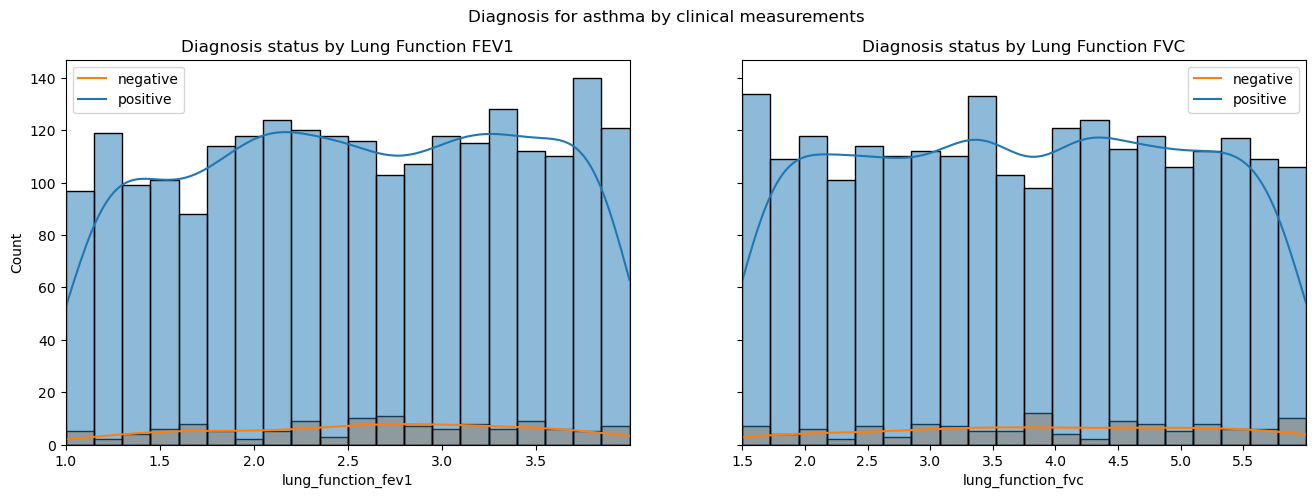

In [64]:
fig, axes = plt.subplots(1, 2, figsize = (16, 5), sharey = True)

sns.histplot(ax = axes[0], data = asthma_data, x = 'lung_function_fev1', hue = 'diagnosis', bins = 20, kde = True)
sns.histplot(ax = axes[1], data = asthma_data, x = 'lung_function_fvc', hue = 'diagnosis', bins = 20, kde = True)

fig.suptitle('Diagnosis for asthma by clinical measurements')
axes[0].set_title('Diagnosis status by Lung Function FEV1')
axes[1].set_title('Diagnosis status by Lung Function FVC')

axes[0].set_xticks(np.arange(1, 4, 0.5))
axes[0].set_xlim(1, 4)
axes[1].set_xticks(np.arange(1.5, 6, 0.5))
axes[1].set_xlim(1.5, 6)

axes[0].legend(labels = ['negative', 'positive'])
axes[1].legend(labels = ['negative', 'positive'])

plt.show()

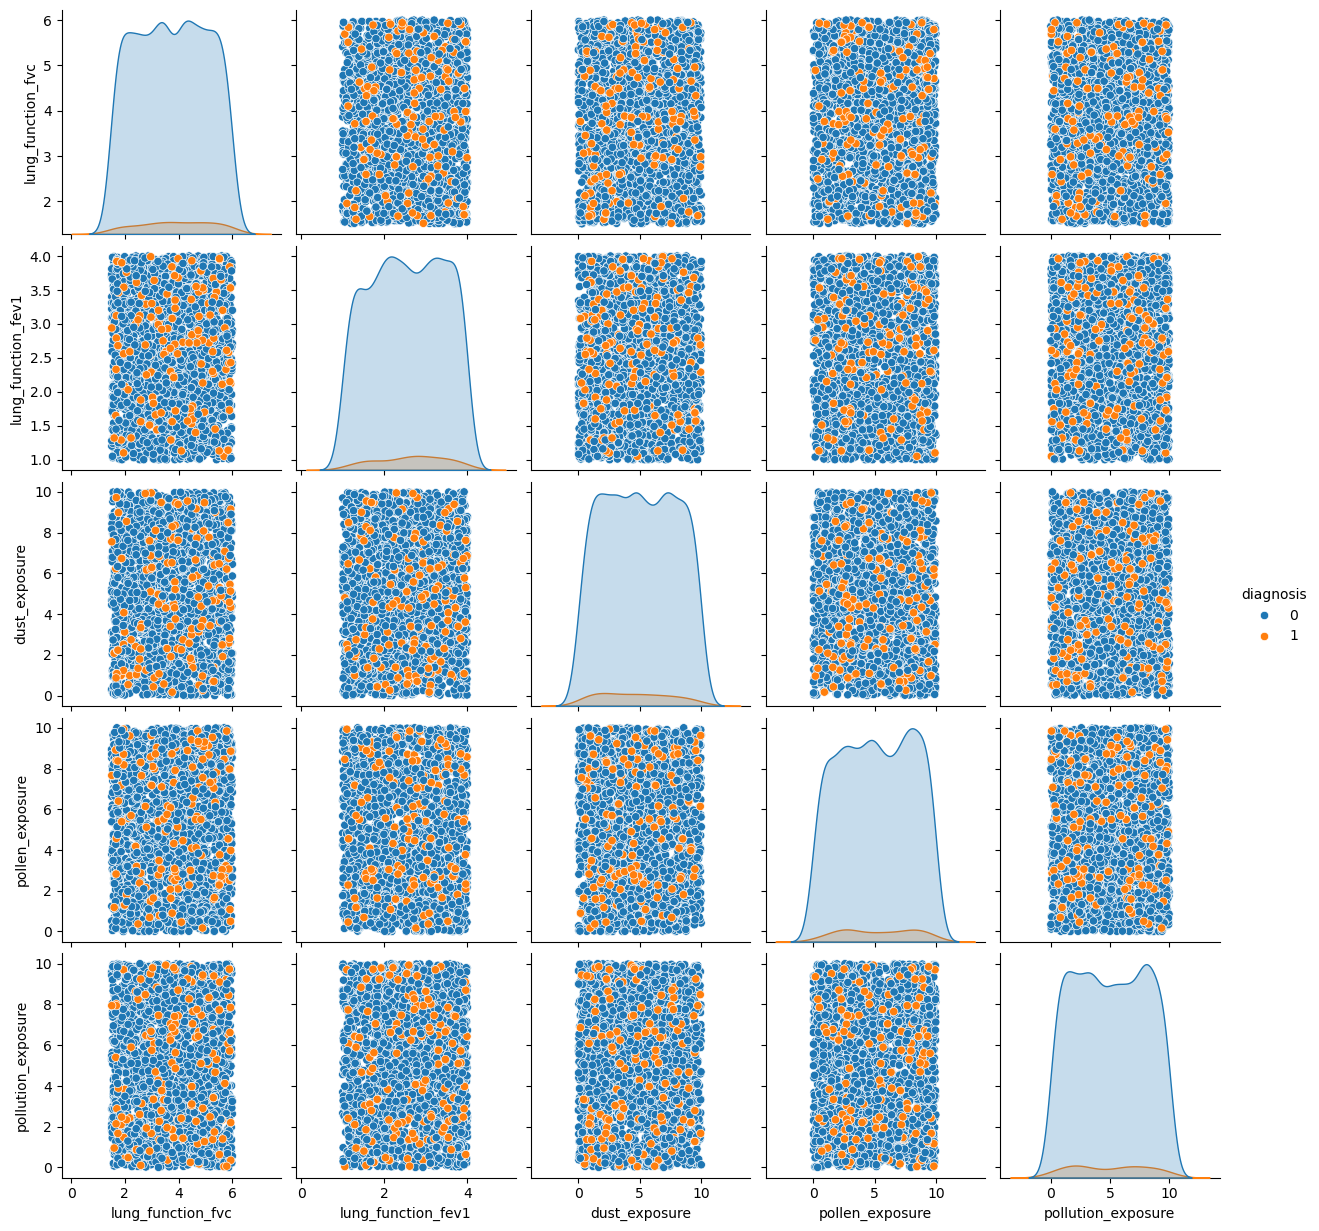

In [24]:
# There are not pairwise relationships across continuous features
sns.pairplot(
    data = asthma_data, hue = 'diagnosis', vars = [
    'lung_function_fvc', 'lung_function_fev1', 'dust_exposure', 'pollen_exposure', 'pollution_exposure']
            )
plt.show()

### Distribution of categorical features

#### Demographic

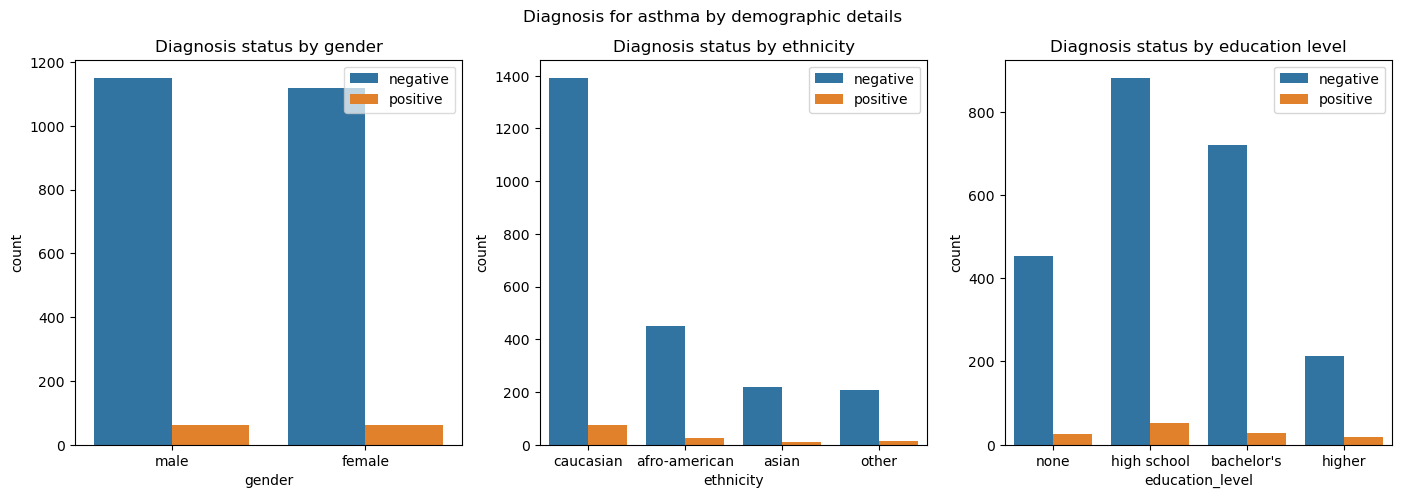

In [89]:
fig, axes = plt.subplots(1, 3, figsize = (17, 5))

sns.countplot(ax = axes[2], data = asthma_data, x = 'education_level', hue = 'diagnosis')
sns.countplot(ax = axes[1], data = asthma_data, x = 'ethnicity', hue = 'diagnosis')
sns.countplot(ax = axes[0], data = asthma_data, x = 'gender', hue = 'diagnosis')

fig.suptitle('Diagnosis for asthma by demographic details')
axes[0].set_title('Diagnosis status by gender')
axes[1].set_title('Diagnosis status by ethnicity')
axes[2].set_title('Diagnosis status by education level')

axes[0].set_xticks(ticks = [0, 1], labels = ['male', 'female'])
axes[1].set_xticks(ticks = [0, 1, 2, 3], labels = ['caucasian', 'afro-american', 'asian', 'other'])
axes[2].set_xticks(ticks = [0, 1, 2, 3], labels = ['none', 'high school', 'bachelor\'s', 'higher'])

axes[0].legend(labels = ['negative', 'positive'], framealpha = 0.7)
axes[1].legend(labels = ['negative', 'positive'])
axes[2].legend(labels = ['negative', 'positive'])

plt.show()

#### Lifestyle and allergy factors

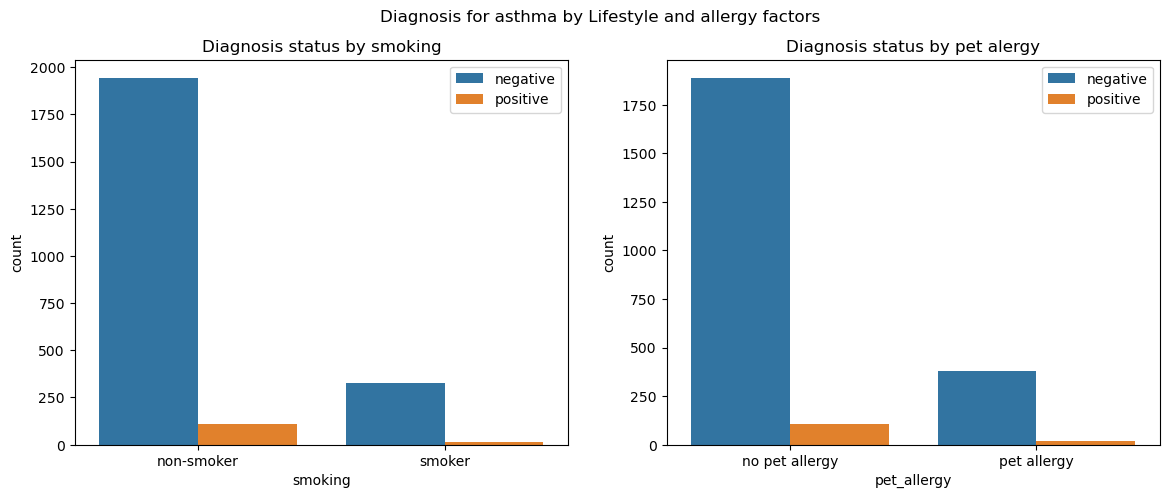

In [85]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

sns.countplot(ax = axes[0], data = asthma_data, x = 'smoking', hue = 'diagnosis')
sns.countplot(ax = axes[1], data = asthma_data, x = 'pet_allergy', hue = 'diagnosis')

fig.suptitle('Diagnosis for asthma by Lifestyle and allergy factors')
axes[0].set_title('Diagnosis status by smoking')
axes[1].set_title('Diagnosis status by pet alergy')

axes[0].set_xticks(ticks = [0, 1], labels = ['non-smoker', 'smoker'])
axes[1].set_xticks(ticks = [0, 1], labels = ['no pet allergy', 'pet allergy'])

axes[0].legend(labels = ['negative', 'positive'])
axes[1].legend(labels = ['negative', 'positive'])

plt.show()

#### Medical history factors

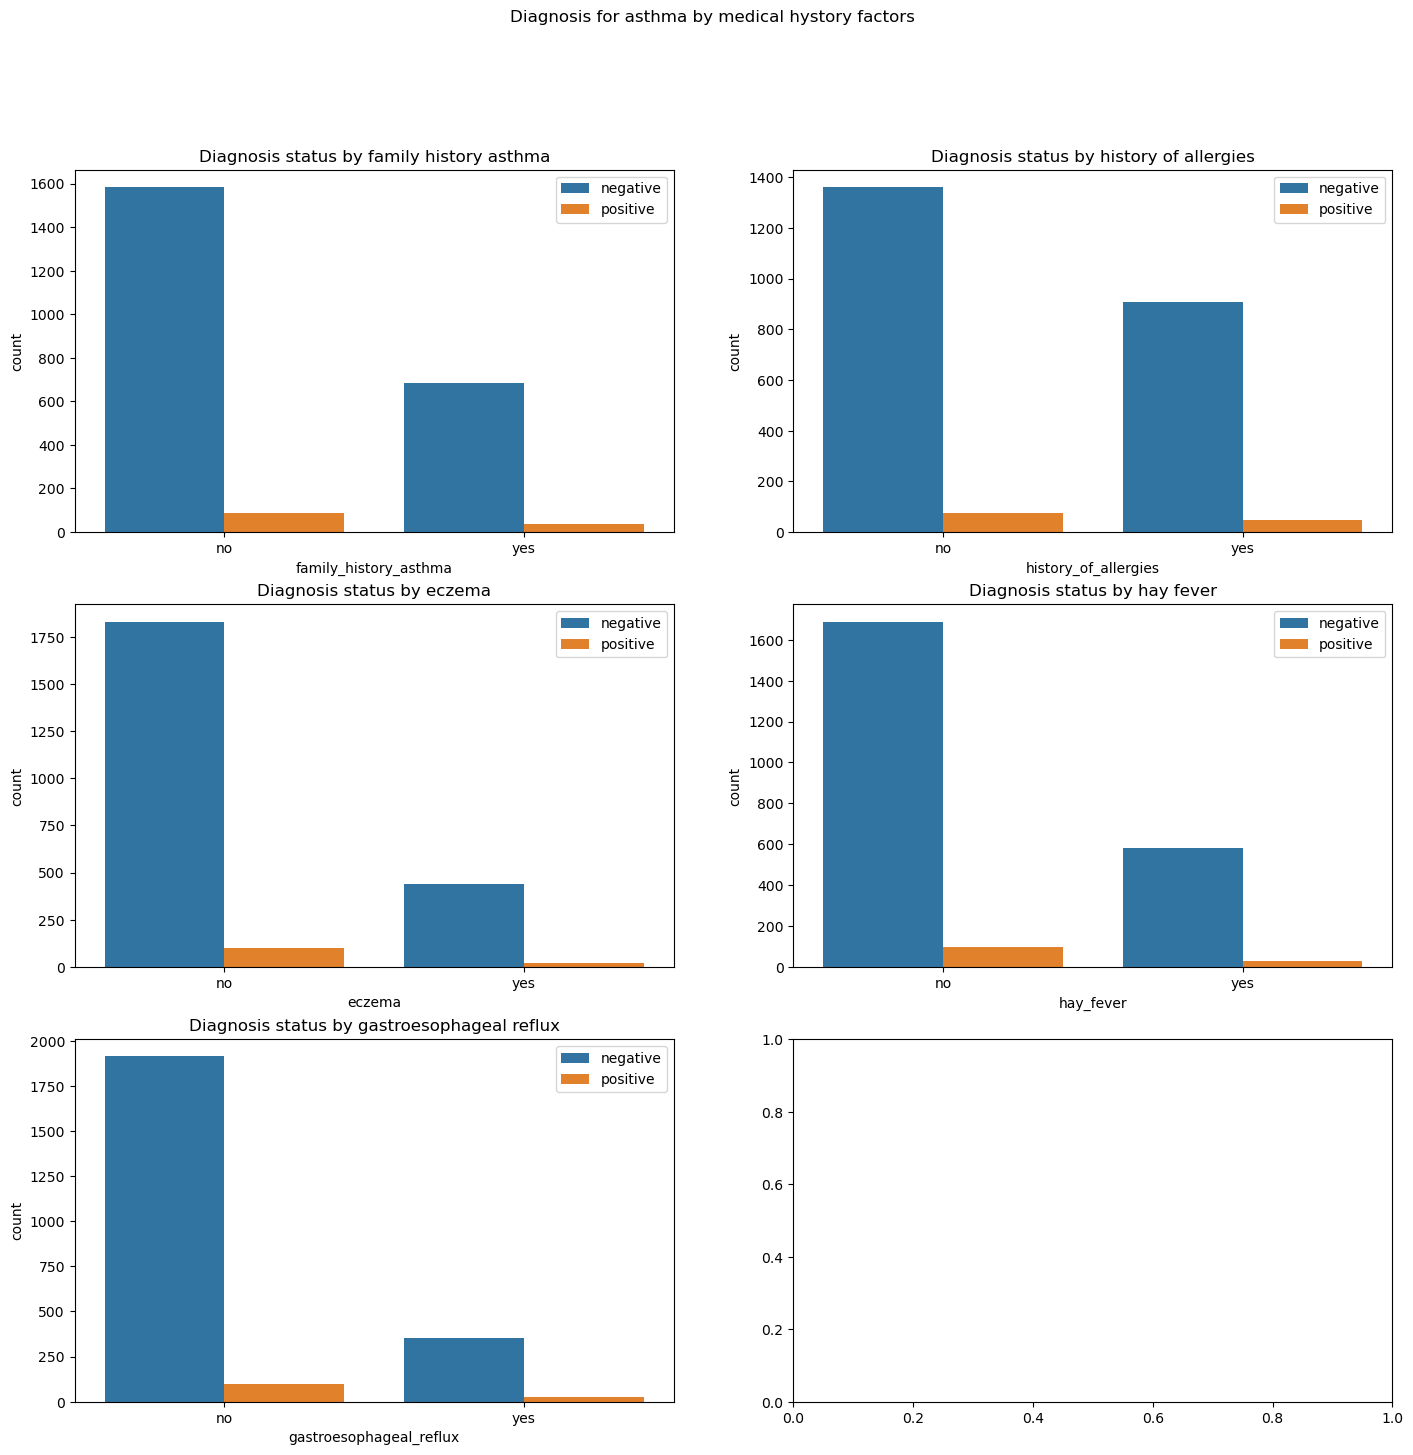

In [95]:
fig, axes = plt.subplots(3, 2, figsize = (17, 16))

sns.countplot(ax = axes[0, 0], data = asthma_data, x = 'family_history_asthma', hue = 'diagnosis')
sns.countplot(ax = axes[0, 1], data = asthma_data, x = 'history_of_allergies', hue = 'diagnosis')
sns.countplot(ax = axes[1, 0], data = asthma_data, x = 'eczema', hue = 'diagnosis')
sns.countplot(ax = axes[1, 1], data = asthma_data, x = 'hay_fever', hue = 'diagnosis')
sns.countplot(ax = axes[2, 0], data = asthma_data, x = 'gastroesophageal_reflux', hue = 'diagnosis')

fig.suptitle('Diagnosis for asthma by medical hystory factors')
axes[0, 0].set_title('Diagnosis status by family history asthma')
axes[0, 1].set_title('Diagnosis status by history of allergies')
axes[1, 0].set_title('Diagnosis status by eczema')
axes[1, 1].set_title('Diagnosis status by hay fever')
axes[2, 0].set_title('Diagnosis status by gastroesophageal reflux')

axes[0, 0].set_xticks(ticks = [0, 1], labels = ['no', 'yes'])
axes[0, 1].set_xticks(ticks = [0, 1], labels = ['no', 'yes'])
axes[1, 0].set_xticks(ticks = [0, 1], labels = ['no', 'yes'])
axes[1, 1].set_xticks(ticks = [0, 1], labels = ['no', 'yes'])
axes[2, 0].set_xticks(ticks = [0, 1], labels = ['no', 'yes'])

axes[0, 0].legend(labels = ['negative', 'positive'])
axes[0, 1].legend(labels = ['negative', 'positive'])
axes[1, 0].legend(labels = ['negative', 'positive'])
axes[1, 1].legend(labels = ['negative', 'positive'])
axes[2, 0].legend(labels = ['negative', 'positive'])

plt.show()

#### Symptoms

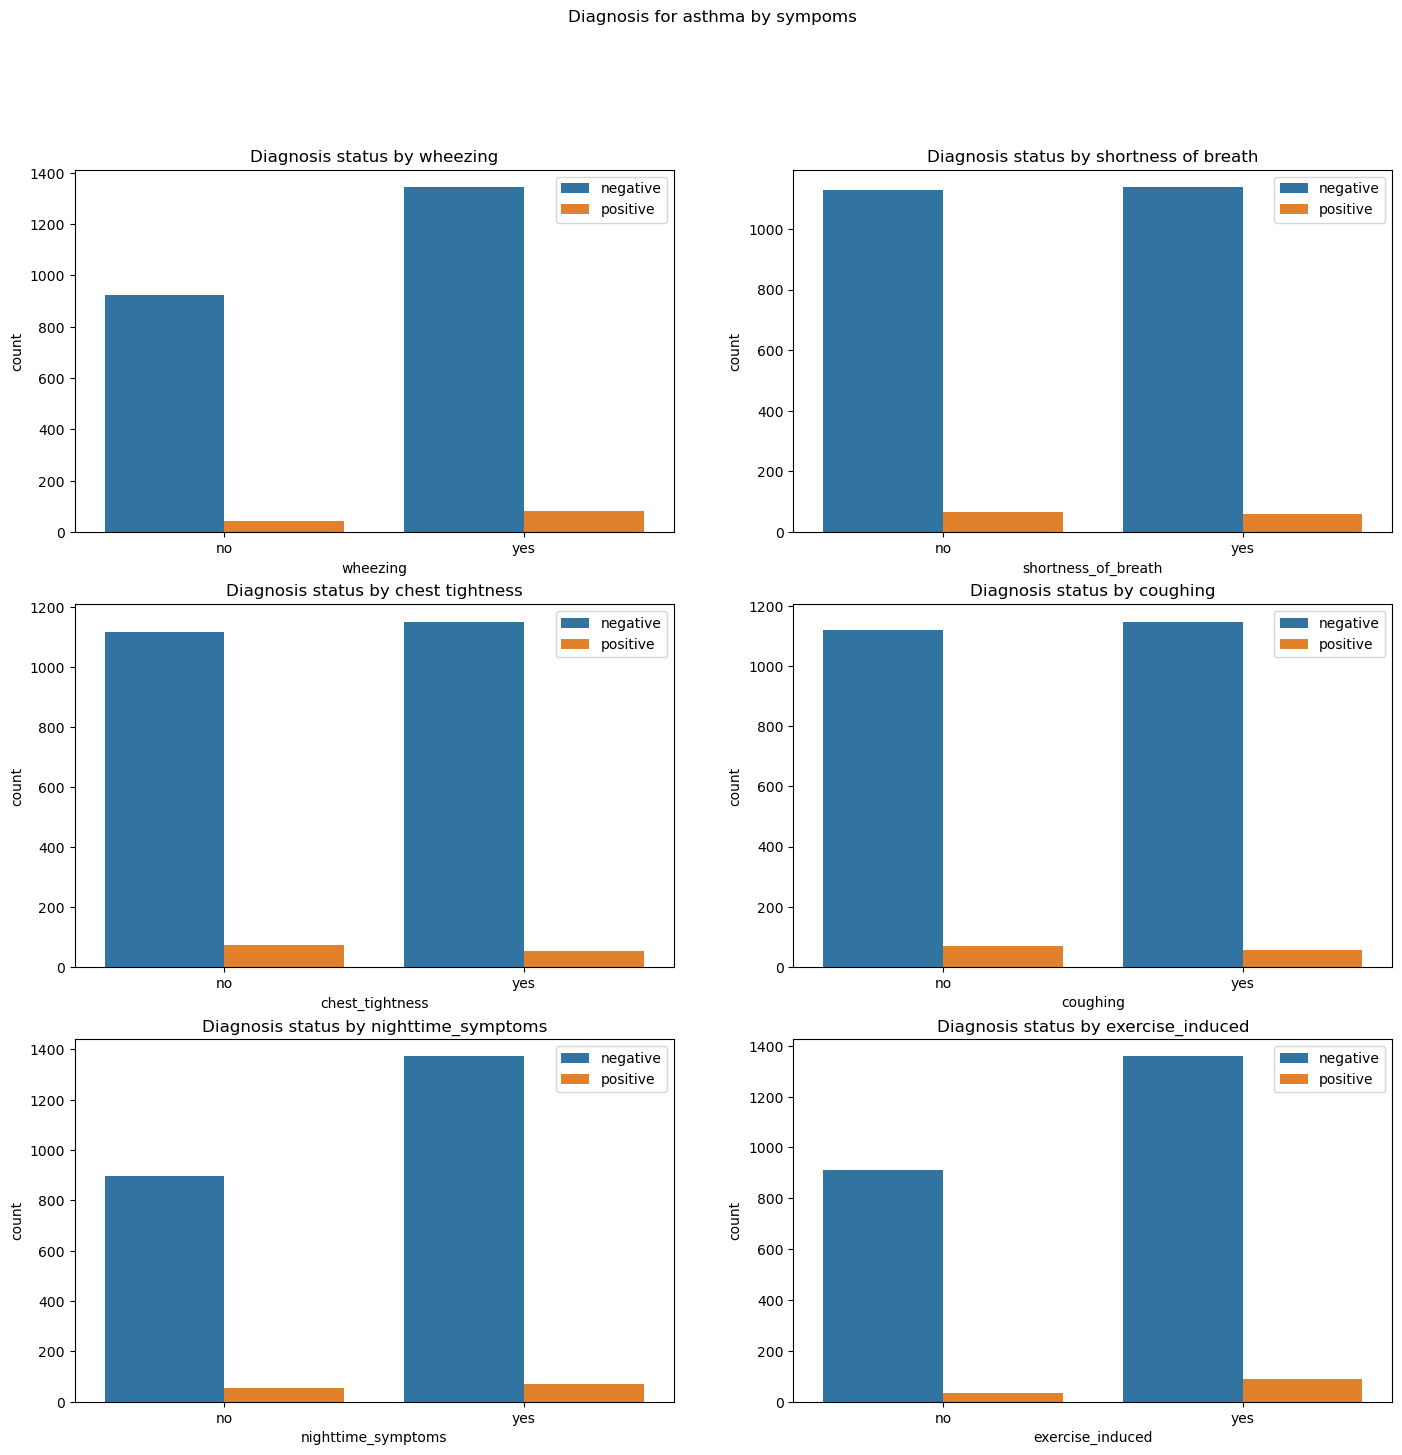

In [98]:
fig, axes = plt.subplots(3, 2, figsize = (17, 16))

sns.countplot(ax = axes[0, 0], data = asthma_data, x = 'wheezing', hue = 'diagnosis')
sns.countplot(ax = axes[0, 1], data = asthma_data, x = 'shortness_of_breath', hue = 'diagnosis')
sns.countplot(ax = axes[1, 0], data = asthma_data, x = 'chest_tightness', hue = 'diagnosis')
sns.countplot(ax = axes[1, 1], data = asthma_data, x = 'coughing', hue = 'diagnosis')
sns.countplot(ax = axes[2, 0], data = asthma_data, x = 'nighttime_symptoms', hue = 'diagnosis')
sns.countplot(ax = axes[2, 1], data = asthma_data, x = 'exercise_induced', hue = 'diagnosis')

fig.suptitle('Diagnosis for asthma by sympoms')
axes[0, 0].set_title('Diagnosis status by wheezing')
axes[0, 1].set_title('Diagnosis status by shortness of breath')
axes[1, 0].set_title('Diagnosis status by chest tightness')
axes[1, 1].set_title('Diagnosis status by coughing')
axes[2, 0].set_title('Diagnosis status by nighttime_symptoms')
axes[2, 1].set_title('Diagnosis status by exercise_induced')

axes[0, 0].set_xticks(ticks = [0, 1], labels = ['no', 'yes'])
axes[0, 1].set_xticks(ticks = [0, 1], labels = ['no', 'yes'])
axes[1, 0].set_xticks(ticks = [0, 1], labels = ['no', 'yes'])
axes[1, 1].set_xticks(ticks = [0, 1], labels = ['no', 'yes'])
axes[2, 0].set_xticks(ticks = [0, 1], labels = ['no', 'yes'])
axes[2, 1].set_xticks(ticks = [0, 1], labels = ['no', 'yes'])

axes[0, 0].legend(labels = ['negative', 'positive'])
axes[0, 1].legend(labels = ['negative', 'positive'])
axes[1, 0].legend(labels = ['negative', 'positive'])
axes[1, 1].legend(labels = ['negative', 'positive'])
axes[2, 0].legend(labels = ['negative', 'positive'])
axes[2, 1].legend(labels = ['negative', 'positive'])

plt.show()

In [99]:
asthma_positive = asthma_data[asthma_data['diagnosis'] == 1]
asthma_positive.shape

(124, 27)

The count of asthma diagnosed patients is 124 - about 5.2 % of all.

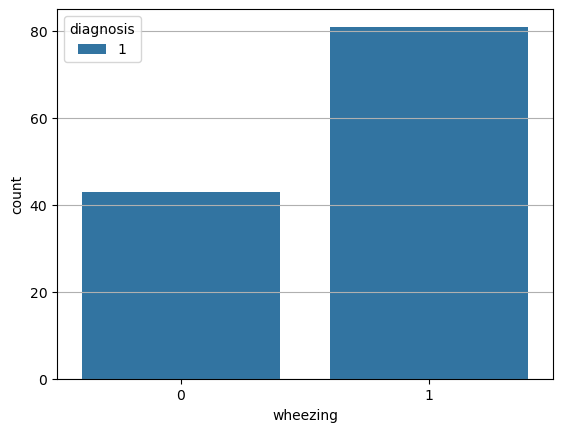

In [114]:
sns.countplot(data = asthma_positive, x = 'wheezing', hue = 'diagnosis')
plt.yticks(np.arange(0, 100, 20))
plt.grid(axis = 'y')
plt.show()

In [110]:
asthma_data['exercise_induced'].value_counts()

exercise_induced
1    1447
0     945
Name: count, dtype: int64